In [1]:
import pandas as pd

# Data Ingestion

In [2]:
df=pd.read_csv('../data/Bengaluru_House_Data.csv')
print(df.shape)
df.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1 = df.drop(["area_type", "availability","society","balcony"], axis= 1)
print(df1.shape)
print(df1.dtypes)
df1.head()

(13320, 5)
location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Pre-processing

In [5]:
# Check for null entries and remove them
print("Initial Null count per column:\n", df1.isnull().sum())
df1 = df1.dropna()
print("Final Null count per column:\n ", df1.isnull().sum())
print(df1.shape)

Initial Null count per column:
 location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64
Final Null count per column:
  location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64
(13246, 5)


In [6]:
# Preprocess estate size date
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [7]:
df1['BHK'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
print(df1.shape)
df1['BHK'].unique()

(13246, 6)


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [8]:
# Preprocess total square feet
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [9]:
def isNum(x):
    try:
        float(x)
    except:
        return False
    return True

In [10]:
#separating the num type and string type data by total_sqft colume
str_sqft_df = df1[~df1['total_sqft'].apply(isNum)]
num_sqft_df = df1[df1['total_sqft'].apply(isNum)]
print(str_sqft_df.shape, num_sqft_df.shape)

(190, 6) (13056, 6)


In [11]:
def ObjToNum(x):
  var = x.split('-')
  if len(var) == 2:
    return (float(var[0])+float(var[1]))/2
  try:
    return float(x)
  except:
    return None

In [12]:
#Converting the string type "total_sqft" to float by taking the average
str_sqft_df['total_sqft'] = str_sqft_df['total_sqft'].apply(ObjToNum)
str_sqft_df.head()

C:\Users\Navneet Kumar\AppData\Local\Temp\ipykernel_26640\836890597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  str_sqft_df['total_sqft'] = str_sqft_df['total_sqft'].apply(ObjToNum)


,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2475.0,4.0,186.000,4
122,Hebbal,4 BHK,5611.5,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1073.5,2.0,54.005,2
165,Sarjapur,2 BHK,1242.5,2.0,43.490,2
188,KR Puram,2 BHK,1277.5,2.0,56.800,2


In [13]:
#merging the converted float type and already float type dataset into one
df2 = pd.concat([str_sqft_df, num_sqft_df], axis=0)
df2.head()

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2475.0,4.0,186.000,4
122,Hebbal,4 BHK,5611.5,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1073.5,2.0,54.005,2
165,Sarjapur,2 BHK,1242.5,2.0,43.490,2
188,KR Puram,2 BHK,1277.5,2.0,56.800,2


In [14]:
df2['total_sqft'] = df2['total_sqft'].astype(float)
print(df2.dtypes)

location       object
size           object
total_sqft    float64
bath          float64
price         float64
BHK             int64
dtype: object


In [15]:
len(df2.location.unique())

1304

#### Adding Price per SQFT feature

In [16]:
df3 = df2.copy()
df3['PricePerSQFT'] = df3['price']*1000000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,BHK,PricePerSQFT
30,Yelahanka,4 BHK,2475.0,4.0,186.000,4,75151.515152
122,Hebbal,4 BHK,5611.5,4.0,477.000,4,85004.009623
137,8th Phase JP Nagar,2 BHK,1073.5,2.0,54.005,2,50307.405682
165,Sarjapur,2 BHK,1242.5,2.0,43.490,2,35002.012072
188,KR Puram,2 BHK,1277.5,2.0,56.800,2,44461.839530


In [17]:
len(df.location.unique())

1306

In [18]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [19]:
len(location_stats[location_stats<=10])

1052

In [20]:
locationLessThan10 = location_stats[location_stats<=10]
locationLessThan10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [21]:
len(df3.location.unique())

1293

In [22]:
df3.location=df3.location.apply(lambda x: 'other' if x in locationLessThan10 else x)
len(df3.location.unique())

242

In [23]:
df3.shape

(13246, 7)

In [24]:
df3[df3.total_sqft/df3.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,PricePerSQFT
9,other,6 Bedroom,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106609.808102
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,62962.962963
70,other,3 Bedroom,500.0,3.0,100.0,3,200000.000000


In [25]:
df4=df3[~(df3.total_sqft/df3.BHK<300)]
df4.head()

,location,size,total_sqft,bath,price,BHK,PricePerSQFT
30,Yelahanka,4 BHK,2475.0,4.0,186.000,4,75151.515152
122,Hebbal,4 BHK,5611.5,4.0,477.000,4,85004.009623
137,8th Phase JP Nagar,2 BHK,1073.5,2.0,54.005,2,50307.405682
165,Sarjapur,2 BHK,1242.5,2.0,43.490,2,35002.012072
188,KR Puram,2 BHK,1277.5,2.0,56.800,2,44461.839530


In [26]:
df4.shape

(12502, 7)

### Removing Outliers

In [27]:
df4["PricePerSQFT"].describe().apply(lambda x:format(x,'f'))

count      12456.000000
mean       63085.028260
std        41681.273385
min         2678.298133
25%        42105.263158
50%        52941.176471
75%        69166.666667
max      1764705.882353
Name: PricePerSQFT, dtype: object

In [28]:
import numpy as np
def remove_outliers(dfx):
    ResDF=pd.DataFrame()
    for key,subdf in dfx.groupby('location'):
        m=np.mean(subdf.PricePerSQFT)
        st=np.std(subdf.PricePerSQFT)
        reducedDF=subdf[(subdf.PricePerSQFT>(m-st))& (subdf.PricePerSQFT<(m+st))]
        ResDF=pd.concat([ResDF,reducedDF],ignore_index=True)
    return ResDF

In [29]:
df5=remove_outliers(df4)
df5.shape

(10241, 7)

In [30]:
import matplotlib.pyplot as plt
def ScatterPlot(dfx, location):
    bhk2 = dfx[(dfx.location == location)&(dfx.BHK == 2)]
    bhk3 = dfx[(dfx.location == location)&(dfx.BHK == 3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='Blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker='+',label='3 BHK',s=50)
    
    plt.xlabel('Total Square Foot')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

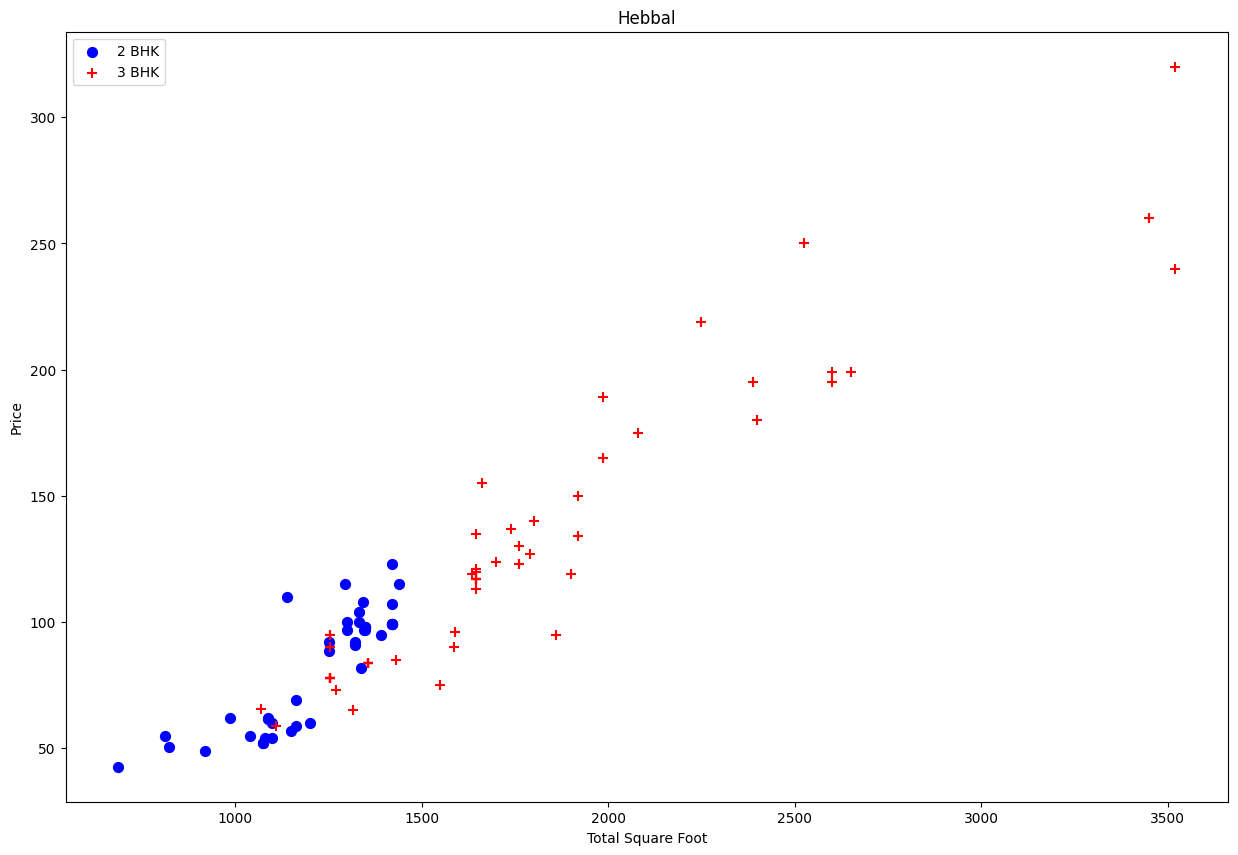

In [31]:
ScatterPlot(df5, "Hebbal")

In [32]:
def remove_bhk_outliers(dfx):
    exclude_indices=np.array([])
    for location, location_df in dfx.groupby('location'):
        bhk_sats={}
        for BHK,BHK_df in location_df.groupby('BHK'):
            bhk_sats[BHK]={
                'mean':np.mean(BHK_df.PricePerSQFT),
                'std':np.std(BHK_df.PricePerSQFT),
                'count':BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby('BHK'):
            stats=bhk_sats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.PricePerSQFT<(stats['mean'])].index.values)
    return dfx.drop(exclude_indices,axis='index')

df6=remove_bhk_outliers(df5)
df6.shape

(7329, 7)

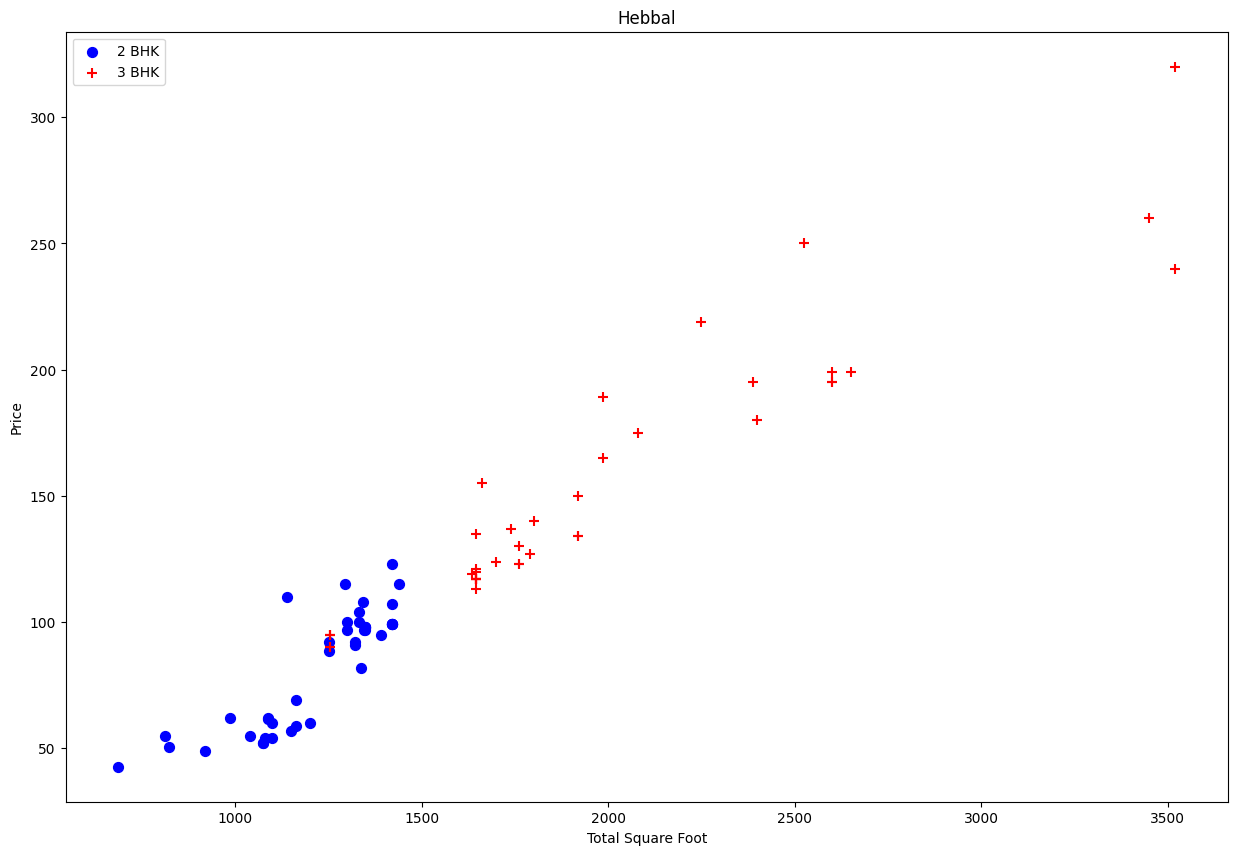

In [33]:
ScatterPlot(df6,"Hebbal")

Text(0, 0.5, 'Count')

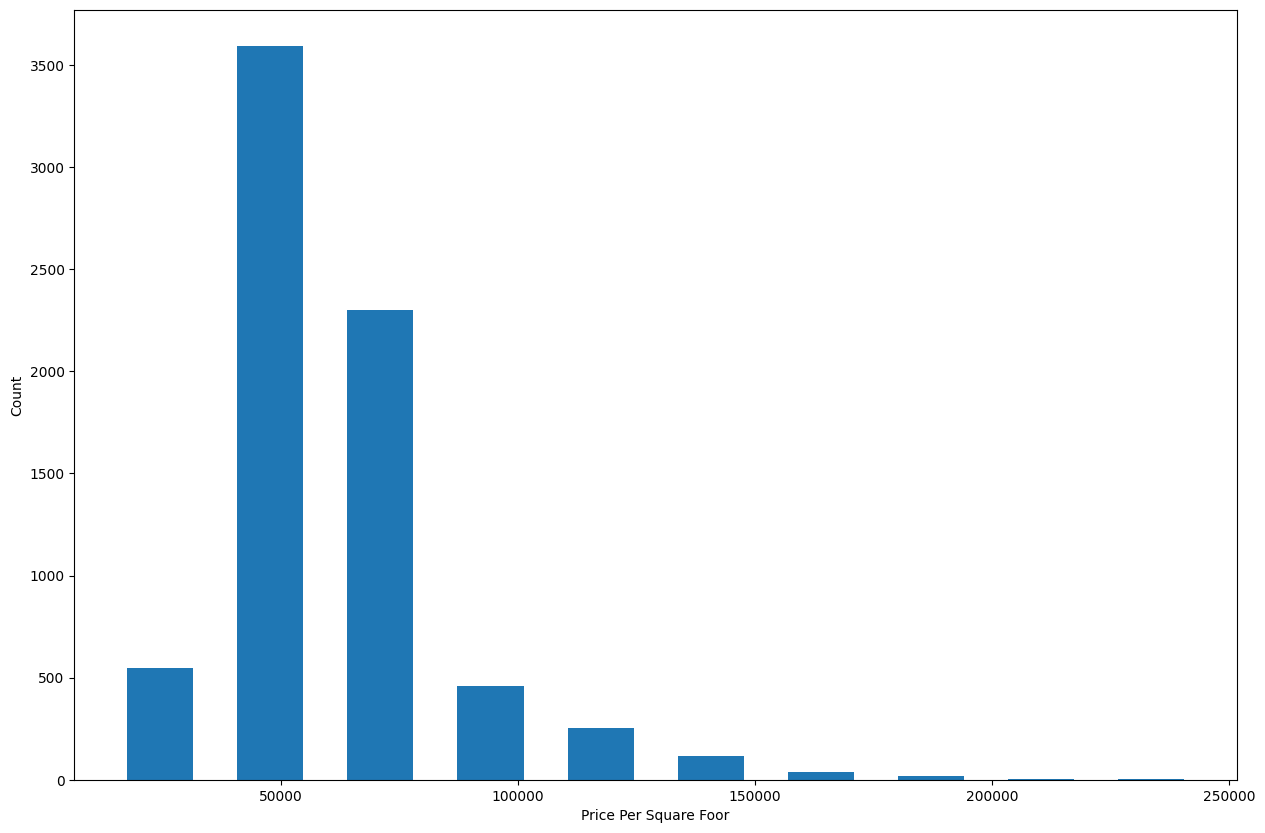

In [34]:
plt.rcParams['figure.figsize']=(15,10)
plt.hist(df6.PricePerSQFT, rwidth=0.6)
plt.xlabel("Price Per Square Foor")
plt.ylabel("Count")

#### Outlier Removal using bathrooom feature

In [35]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [36]:
len(df6[df6.bath>10])

5

Text(0, 0.5, 'Count')

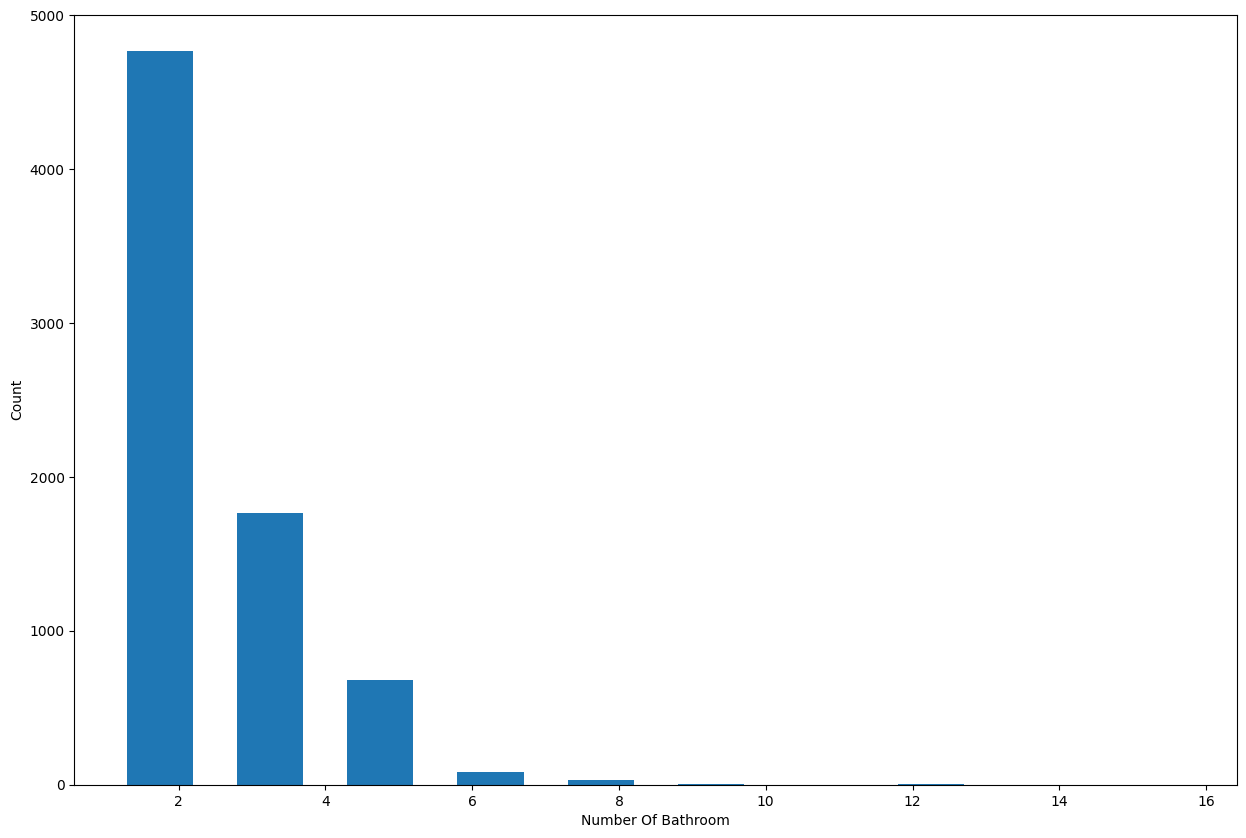

In [37]:
plt.rcParams['figure.figsize']=(15, 10)
plt.hist(df6.bath,rwidth=0.6)
plt.xlabel("Number Of Bathroom")
plt.ylabel("Count")

In [38]:
len(df6[df6.bath>df6.BHK+2])

4

In [39]:
df6 = df6[df6.bath<df6.BHK+2]
df6.shape

(7251, 7)

In [40]:
df7=df6.drop(['size','PricePerSQFT'],axis='columns')
df7

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


In [41]:
#One hot encoding
dummies=pd.get_dummies(df7.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df8=pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df9 = df8.drop('location', axis = 1)
df9.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Building the Model

In [44]:
df9.shape

(7251, 245)

In [45]:
X=df9.drop('price',axis='columns')
y = df9.price

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [47]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [48]:
model.score(X_test,y_test)

0.8525817845658998

#### Using K Fold cross validation to measure accuracy of the LinearRegression model

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80713209, 0.79416366, 0.85641401, 0.86342575, 0.87184966])

In [50]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def BestModel(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

BestModel(X,y)

C:\Tools\Anaconda\envs\pritika\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Tools\Anaconda\envs\pritika\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipel

,model,best_score,best_params
0,linear_regression,0.838597,{'normalize': True}
1,lasso,0.717370,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.722380,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [51]:
y_pred = model.predict(X_test)

ValueError: x and y must be the same size

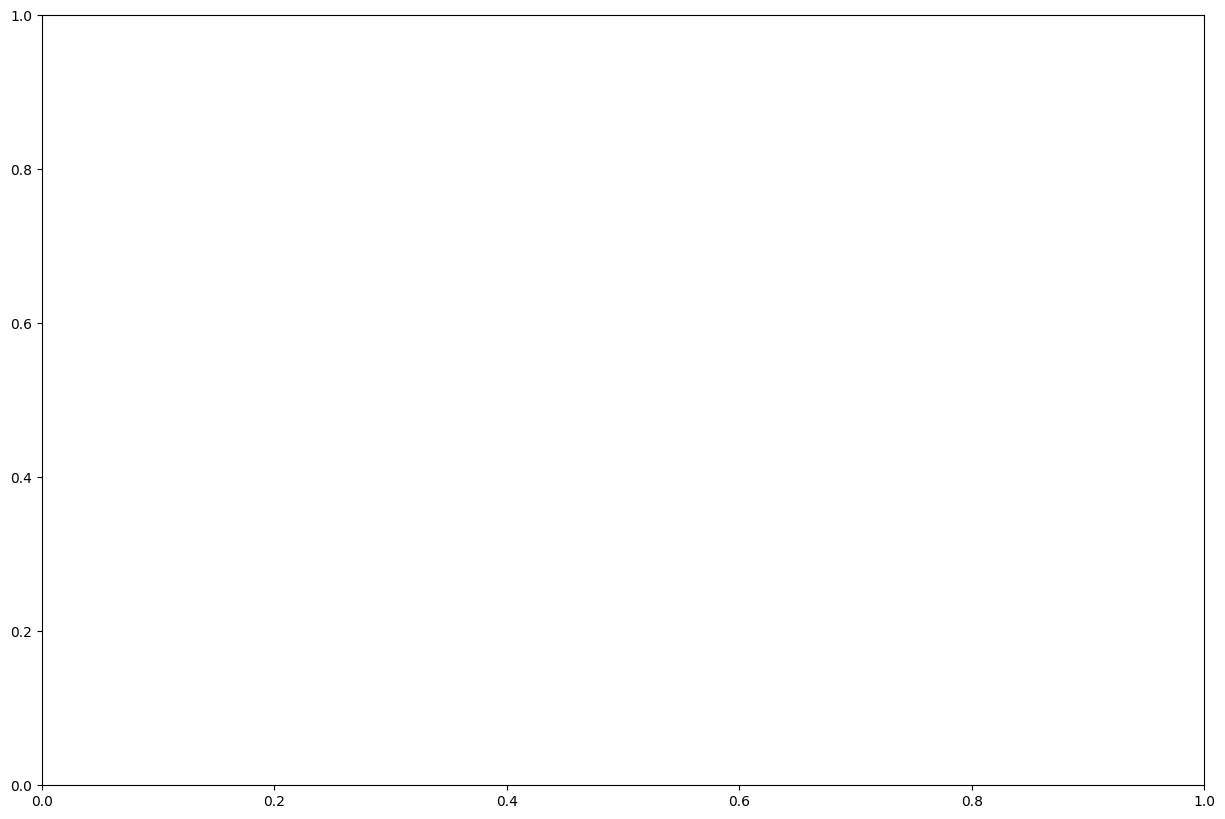

In [52]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.show()

## Testing the model

In [53]:
def predictPrice(location,sqft,bath,BHK):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=BHK
    if loc_index >=0:
        x[loc_index]=1
    return model.predict([x])[0]

In [54]:
predictPrice('1st Phase JP Nagar',1000,2,2)

C:\Tools\Anaconda\envs\pritika\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.01822280049979

In [55]:
predictPrice('Hebbal',2000,2,2)

C:\Tools\Anaconda\envs\pritika\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


149.84099436216678

In [56]:
predictPrice('Yelahanka',2500,2,3)

C:\Tools\Anaconda\envs\pritika\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


166.14752793327372

# Model Persistence

In [57]:
import joblib
joblib.dump(model, '../model/price-prediction-model.pkl')

['../model/price-prediction-model.pkl']

In [60]:
# Load the pickeled model and check if it works
model = joblib.load(open('../model/price-prediction-model.pkl', 'rb'))

In [61]:
predictPrice('Yelahanka',2500,2,3)

C:\Tools\Anaconda\envs\pritika\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


166.14752793327372